In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
df = pd.read_excel('/home/vivek/Downloads/table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls')
df.columns = ['City', 'population', 'violent crime', 'murder', 'rape', 'rape^2', 'robbery', 'aggravated assault', 'property crime', 'burglary', 'larceny-theft', 'motor vehicle theft', 'arson^3']

In [3]:
df.head()

,City,population,violent crime,murder,rape,rape^2,robbery,aggravated assault,property crime,burglary,larceny-theft,motor vehicle theft,arson^3
0,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"by City, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3
4,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0


In [4]:
df = df.drop(['rape', 'arson^3', 'aggravated assault', 'rape^2', 'burglary', 'larceny-theft', 'motor vehicle theft', 'violent crime'], axis=1)
df = df.drop([3])

In [5]:
df = df.dropna()
print(df.shape)

(348, 5)


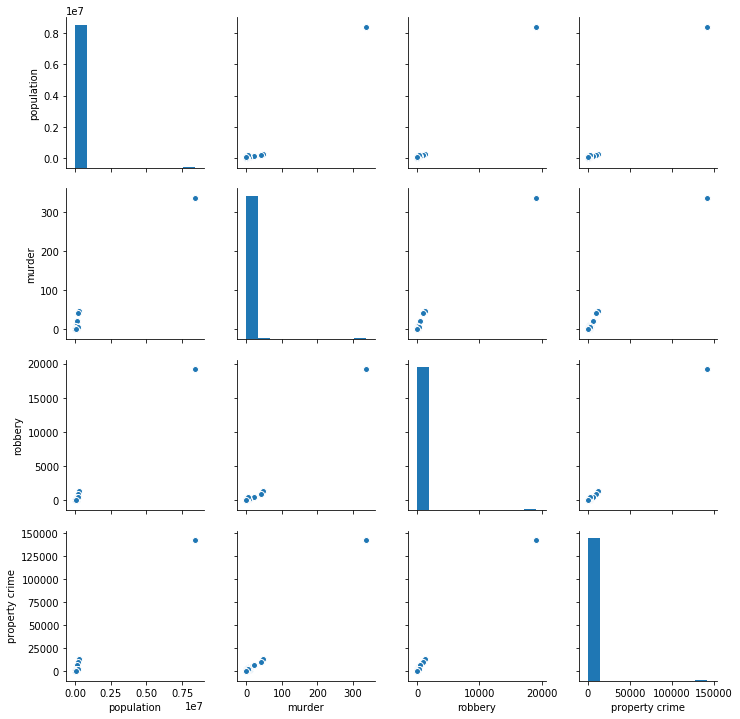

In [6]:
sns.pairplot(df)

Now, it looks much better

In [7]:
df['population^2'] = df['population'] * df['population']
df.loc[df['murder']>0, 'murder'] = 1
df.loc[df['robbery']>0, 'robbery'] = 1

In [8]:
x = df[['population', 'population^2', 'murder', 'robbery']]
y = df['property crime']

# We have chosen these features because they are not corelated to each other.
# population is most effective feature in input. so we have used it's square too for giving it more importance.
# Further murder and robbery are converted to categorical variables.

reg = linear_model.LinearRegression()
reg.fit(x,y)
print("R-squared: ", reg.score(x,y))
print("Coefficients: ", reg.coef_)

# These features explain most of the variance in data.

R-squared:  0.9961247104988709
Coefficients:  [ 3.46570268e-02 -2.11108019e-09  1.51866535e+01 -9.62774363e+01]
